[0]	validation_0-auc:0.983058	validation_1-auc:0.947247
[1]	validation_0-auc:0.986154	validation_1-auc:0.960255
[2]	validation_0-auc:0.99269	validation_1-auc:0.972868
[3]	validation_0-auc:0.992719	validation_1-auc:0.976481
[4]	validation_0-auc:0.99355	validation_1-auc:0.977401
[5]	validation_0-auc:0.99613	validation_1-auc:0.97727
[6]	validation_0-auc:0.996202	validation_1-auc:0.977664
[7]	validation_0-auc:0.996918	validation_1-auc:0.979897
[8]	validation_0-auc:0.997291	validation_1-auc:0.981474
[9]	validation_0-auc:0.997219	validation_1-auc:0.98154
[10]	validation_0-auc:0.99732	validation_1-auc:0.980489
[11]	validation_0-auc:0.997477	validation_1-auc:0.982
[12]	validation_0-auc:0.997864	validation_1-auc:0.987847
[13]	validation_0-auc:0.997879	validation_1-auc:0.987781
[14]	validation_0-auc:0.998137	validation_1-auc:0.987649
[15]	validation_0-auc:0.998251	validation_1-auc:0.988044
[16]	validation_0-auc:0.99828	validation_1-auc:0.988175
[17]	validation_0-auc:0.998395	validation_1-auc:0.9

<Figure size 1368x360 with 0 Axes>

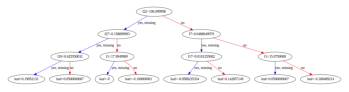

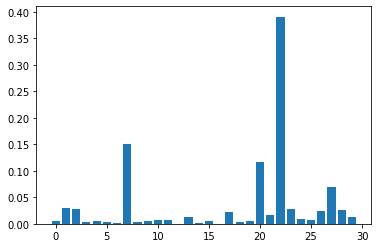

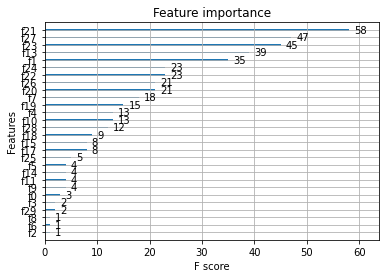

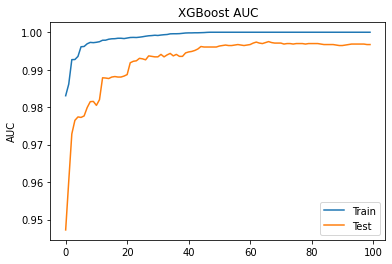

In [6]:
from numpy import loadtxt 
from xgboost import XGBClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_breast_cancer
 
# load data
dataset = load_breast_cancer(return_X_y=True)
 
# split data into X and y 
X = dataset[0] 
Y = dataset[1]
 
# tvt split
seed = 7
test_size = 0.33
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=test_size, random_state=seed)
eval_set = [(X_train, y_train), (X_test, y_test)]
 
# fit model no training data 
model = XGBClassifier() 
model.fit(X_train, y_train, eval_metric="auc", eval_set=eval_set, verbose=True)
 
print(model)
 
# make predictions for test data 
y_pred = model.predict(X_test) 
predictions = [round(value) for value in y_pred]
 
# evaluate predictions 
accuracy = accuracy_score(y_test, predictions) 
print("Accuracy: %.2f%%" % (accuracy * 100.0))
 
# tree plot
from xgboost import plot_tree
import matplotlib.pyplot as plt
 
plt.figure(figsize=(19, 5))
plot_tree(model)
plt.show()
 
# feature important plot
plt.bar(range(len(model.feature_importances_)), model.feature_importances_)
plt.show()
 
# default plot
from xgboost import plot_importance
plot_importance(model)
plt.show()
 
# evaluation plot
# retrieve performance metrics 
results = model.evals_result()
epochs = len(results['validation_0' ]['auc'])
x_axis = range(0, epochs)
 
fig, ax = plt.subplots()
ax.plot(x_axis, results['validation_0']['auc'], label='Train')
ax.plot(x_axis, results['validation_1']['auc'], label='Test')
ax.legend()
plt.ylabel('AUC')
plt.title('XGBoost AUC')
plt.show()

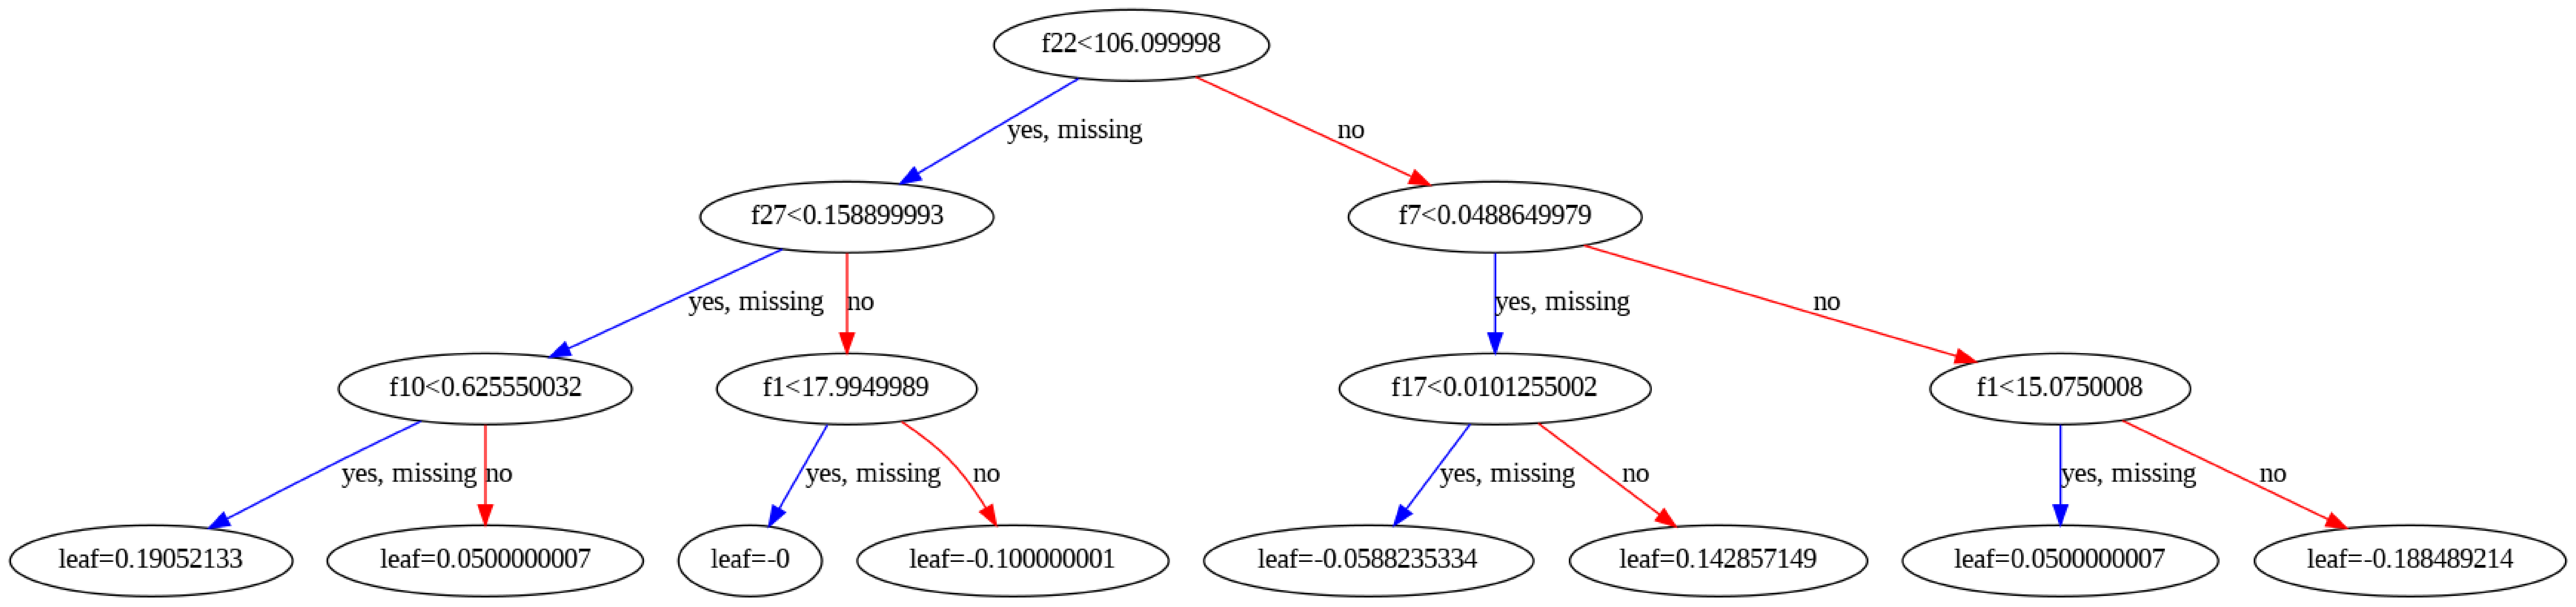

In [5]:
# tree plot
from xgboost import plot_tree
import matplotlib.pyplot as plt
 
plot_tree(model)
fig = plt.gcf()
fig.set_size_inches(150, 100)
fig.savefig('tree.png')
plt.show()